## Loading and Handling Time Series in Pandas ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('./data/airPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [9]:
## define the function in the desired date format
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [5]:
print(dateparse)

<function <lambda> at 0x117f66b70>


In [16]:
data = pd.read_csv('./data/airPassengers.csv', parse_dates=['Month'], \
                   index_col='Month',date_parser=dateparse)

## Watch out the multi-index ##

In [17]:
print(data.head(3))


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132


In [18]:
ts = data['#Passengers']
ts.head(4)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
Name: #Passengers, dtype: int64

## Get the data from the time range ##  
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

In [19]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [20]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [22]:
ts['1949-12']

Month
1949-12-01    118
Name: #Passengers, dtype: int64

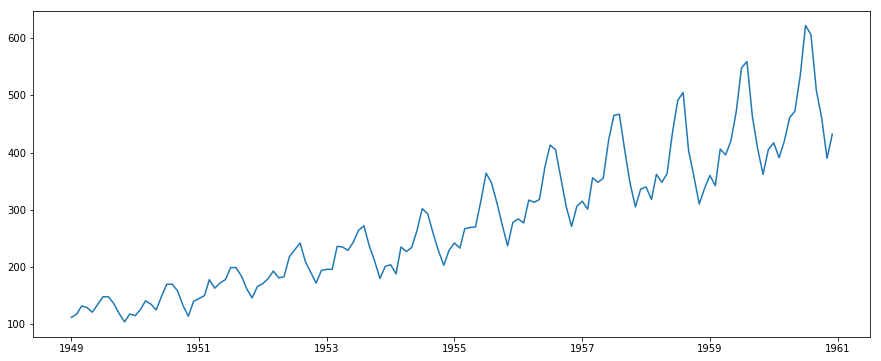

In [23]:
plt.plot(ts)

In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

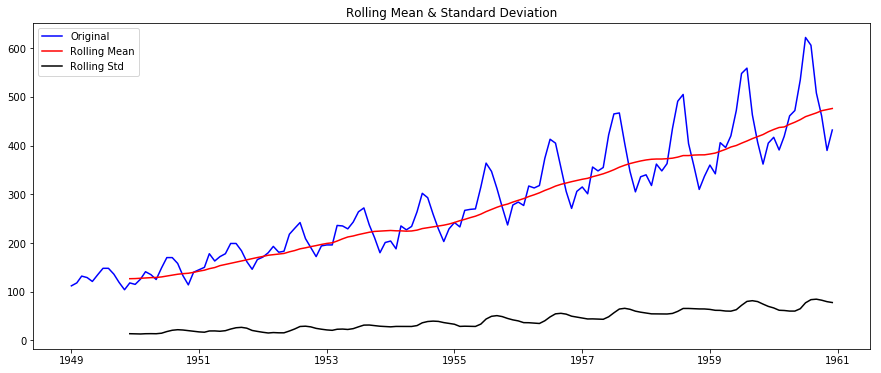

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
test_stationarity(ts)